# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


from api_keys import weather_api_key


from citipy import citipy

#Get cities from output file
output_data_file = "../output_data/cities.csv"

##Set Latitude and Longitude ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
##Set up URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

##Build query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="


## Generate Cities List

In [3]:
lat_lngs = []
cities = []


##get random lat and lng data
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

##Find the cities for each lat/lng
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)
    

In [4]:
cities_df = pd.DataFrame({"City": cities})
cities_df["Latitude"]=''
cities_df["Longitude"]=''
cities_df["Max Temp"]=''
cities_df["Humidity"]=''
cities_df["Cloudiness"]=''
cities_df["Wind Speed"]=''
cities_df["Country"]=''
cities_df["Date"]=''
cities_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,,,,,,,,
1,rikitea,,,,,,,,
2,jalu,,,,,,,,
3,thinadhoo,,,,,,,,
4,mataura,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
record_count = 0
set_count = 1
print("Beginning Data Retrieval")
print("------------------------------")
for index, row in cities_df.iterrows():
    city = row['City']
    response = requests.get(query_url + city).json()
    
##Update record and set counts to display during processing
    record_count += 1
    if record_count == 51:
        set_count += 1
        record_count = 1
        
##Populate dataframe with the response returned   
    try:
        cities_df.loc[index, 'Latitude'] = response['coord']['lat']
        cities_df.loc[index, 'Longitude'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']

        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    except:
        i = cities_df[cities_df['City']==city].index
        print(f"City {city} not found. Skipping...")
        cities_df.drop(i, inplace=True)  
        pass
        

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | jalu
Processing Record 4 of Set 1 | thinadhoo
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | sal rei
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | jiuquan
Processing Record 9 of Set 1 | kholmogory
Processing Record 10 of Set 1 | charlestown
Processing Record 11 of Set 1 | karlstad
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | flinders
City cockburn harbour not found. Skipping...
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | huarmey
Processing Record 20 of Set 1 | lastoursville
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | kokopo
Processing Record 23 of Set 1 | azangaro


Processing Record 50 of Set 4 | mandera
Processing Record 1 of Set 5 | porangatu
Processing Record 2 of Set 5 | torbay
City rungata not found. Skipping...
Processing Record 4 of Set 5 | saldanha
City ituni not found. Skipping...
Processing Record 6 of Set 5 | xining
Processing Record 7 of Set 5 | vardo
Processing Record 8 of Set 5 | yerbogachen
City malwan not found. Skipping...
Processing Record 10 of Set 5 | mongomo
Processing Record 11 of Set 5 | bilma
Processing Record 12 of Set 5 | north bend
Processing Record 13 of Set 5 | mozarlandia
Processing Record 14 of Set 5 | victoria
Processing Record 15 of Set 5 | longyearbyen
Processing Record 16 of Set 5 | sosnovo-ozerskoye
Processing Record 17 of Set 5 | eganville
Processing Record 18 of Set 5 | euclides da cunha
City nizhneyansk not found. Skipping...
Processing Record 20 of Set 5 | artesia
Processing Record 21 of Set 5 | dillingen
Processing Record 22 of Set 5 | neiafu
Processing Record 23 of Set 5 | alexandria
Processing Record 24 

Processing Record 50 of Set 8 | agirish
City halalo not found. Skipping...
Processing Record 2 of Set 9 | luau
Processing Record 3 of Set 9 | togur
Processing Record 4 of Set 9 | padang
Processing Record 5 of Set 9 | eyl
Processing Record 6 of Set 9 | bilokurakyne
Processing Record 7 of Set 9 | mont-dore
Processing Record 8 of Set 9 | chiknayakanhalli
Processing Record 9 of Set 9 | vao
Processing Record 10 of Set 9 | abay
Processing Record 11 of Set 9 | avera
Processing Record 12 of Set 9 | gigmoto
Processing Record 13 of Set 9 | dzerzhinskoye
Processing Record 14 of Set 9 | vanavara
Processing Record 15 of Set 9 | isparta
Processing Record 16 of Set 9 | media luna
Processing Record 17 of Set 9 | najran
City mrirt not found. Skipping...
Processing Record 19 of Set 9 | cayenne
Processing Record 20 of Set 9 | saint-leu
Processing Record 21 of Set 9 | ketchikan
City bargal not found. Skipping...
Processing Record 23 of Set 9 | ballitoville
Processing Record 24 of Set 9 | aleksandrov gay
P

Processing Record 50 of Set 12 | houma
Processing Record 1 of Set 13 | jacareacanga
Processing Record 2 of Set 13 | calama
Processing Record 3 of Set 13 | san patricio
Processing Record 4 of Set 13 | nyazepetrovsk
City samusu not found. Skipping...
Processing Record 6 of Set 13 | souillac
Processing Record 7 of Set 13 | oranjestad
Processing Record 8 of Set 13 | monte patria
City ruatoria not found. Skipping...
Processing Record 10 of Set 13 | moose factory
Processing Record 11 of Set 13 | sao joao da barra
Processing Record 12 of Set 13 | upata
Processing Record 13 of Set 13 | abu kamal
Processing Record 14 of Set 13 | korem
Processing Record 15 of Set 13 | umm lajj
Processing Record 16 of Set 13 | cabo rojo
Processing Record 17 of Set 13 | morondava
Processing Record 18 of Set 13 | kirkuk
Processing Record 19 of Set 13 | aksu
Processing Record 20 of Set 13 | collie
Processing Record 21 of Set 13 | preobrazheniye
Processing Record 22 of Set 13 | ambon
Processing Record 23 of Set 13 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df.to_csv("../output_data/citiesweatherdata.csv", index = False)
cities_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.88,147.33,57.2,47,40,5.82,AU,1597818296
1,rikitea,-23.12,-134.97,71.78,82,71,12.71,PF,1597818551
2,jalu,29.03,21.55,81.25,43,0,6.96,LY,1597818551
3,thinadhoo,0.53,72.93,84.76,68,84,9.04,MV,1597818551
4,mataura,-46.19,168.86,52,89,63,1.99,NZ,1597818551


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cities_df.loc[cities_df['Humidity']>100]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Latitude vs. Temperature Plot

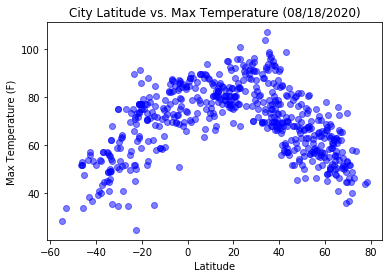

The closer you get to the equator, the warmer the temperature gets.


In [15]:
plt.scatter(cities_df['Latitude'], cities_df['Max Temp'], color = 'blue', alpha = .5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (08/18/2020)")

plt.savefig("../output_data/maxtemp.png")
plt.show()

print("The closer you get to the equator, the warmer the temperature gets.")

## Latitude vs. Humidity Plot

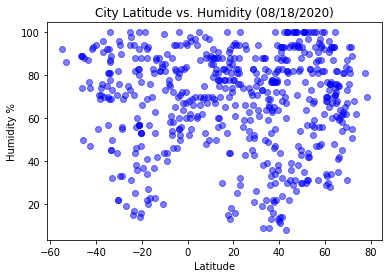

This plot shows the humidity for cities compared to latitude. It can be said that the closer to you come to the equator the less humid it may be.


In [16]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity'], color = 'blue', alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs. Humidity (08/18/2020)")

plt.savefig("../output_data/humidity.png")
plt.show()

print("This plot shows the humidity for cities compared to latitude. It can be said that the closer to you come to the equator the less humid it may be.")

## Latitude vs. Cloudiness Plot

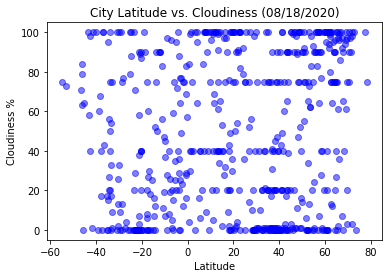

The plot shows city latitude vs. cloudiness. There is no correlation between latitude and cloudiness.


In [17]:
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'], color = 'blue', alpha = .5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"City Latitude vs. Cloudiness (08/18/2020)")

plt.savefig("../output_data/cloudiness.png")
plt.show()

print("The plot shows city latitude vs. cloudiness. There is no correlation between latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

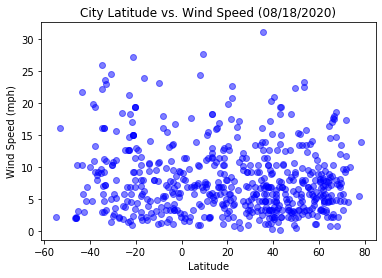

According to the plot chart, latitude does not affect wind speeds.


In [14]:
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'],color='blue',alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed (08/18/2020)")

plt.savefig("../output_data/wind_speed.png")
plt.show()

print("According to the plot chart, latitude does not affect wind speeds.")